# Morning: Introduction to Time Series Analysis
The simplest demonstration of temporal dependence is seen by considering a univariate time series $y(t)$. In our case, $y(t)$ may be the surface-level atmsopheric concentration of ozone at a single EPA air-quality station in Orange County.

In [42]:
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

r = robjects.r
nlme = importr('nlme')

## What generates the pattern?

## Is there a trend?

In [13]:
#-- Get El Nino data
sst = np.loadtxt('../Data/detrend.nino34.ascii.txt',skiprows=1)
y1 = sst[:,2]
t1 = np.linspace(1950,2017,len(y1))

#-- Convert Numpy arrays to R objects
robjects.globalenv["y2"] = robjects.FloatVector(y1)
robjects.globalenv["t2"] = robjects.FloatVector(t1)

#-- fit and display results
print r.summary(r.lm("y2 ~ t2"))


Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offse

## Generate sample realizations (TO BE COMPLETED)

## The autocorrelation function

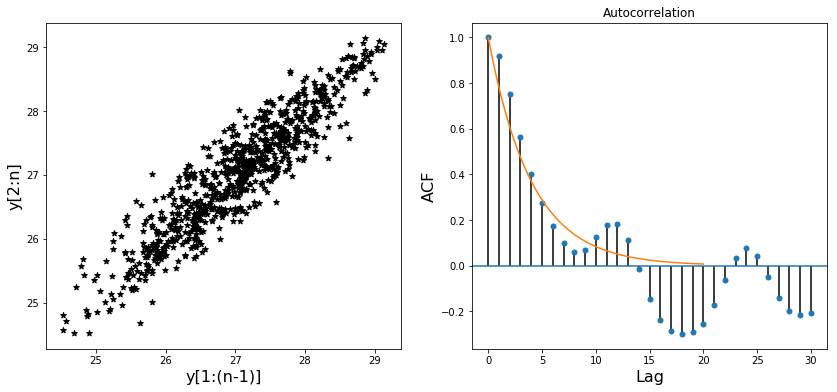

In [16]:
#-- Use the same sst data as above
n = len(y1) # number of elements

#-- Set up figure
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)

#-- Plot scatter plot of values shifted by 1
ax1.scatter(y1[1:(n-1)],y1[2:n],color='k',marker='*')
ax1.set_xlabel('y[1:(n-1)]',fontsize=16)
ax1.set_ylabel('y[2:n]',fontsize=16)

#-- plot autocorrelation
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_acf(y1,lags=30,alpha=None,ax=ax2)
ax2.plot(np.linspace(0,20),0.78**np.linspace(0,20))
ax2.set_xlabel('Lag', fontsize=16)
ax2.set_ylabel('ACF',fontsize=16)
plt.show()

## Generate various time series structures

## Simulation of slope estimation

## Simple trend analysis with autocorrelation (FIX: DOESN'T TAKE CORR INTO ACCOUNT!)

In [47]:
robjects.globalenv["y2"] = robjects.FloatVector(y1)
robjects.globalenv["t2"] = robjects.FloatVector(t1)
print r.summary(nlme.gls(r.formula("y2 ~ t2", correlation=nlme.corAR1())))

Generalized least squares fit by REML
  Model: y2 ~ t2 
  Data: NULL 
       AIC      BIC    logLik
  2162.433 2176.506 -1078.217

Coefficients:
               Value Std.Error  t-value p-value
(Intercept) 10.68885  3.290339 3.248555  0.0012
t2           0.00823  0.001659 4.961196  0.0000

 Correlation: 
   (Intr)
t2 -1    

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.63229171 -0.70582293  0.06662802  0.68451484  2.15986358 

Residual standard error: 0.9125292 
Degrees of freedom: 807 total; 805 residual



In [43]:
#------------------------------------------------------------------------------------------------------
#-- OPTIONAL ADDITION: CALCULATING COVARIANCE MATRIX IN PYTHON FOR TREND ANALYSIS WITH AUTOCORRELATION
#------------------------------------------------------------------------------------------------------

#-- Make design matrix
X = np.column_stack((np.ones(len(t1)),t1))
#-- First fit our data and design matrix from above and get the residuals
ols_resid = sm.OLS(y1,X).fit().resid
#-- Now we want to fit the residuals from the second element to the end vs. from the beginning to the second last 
#-- i.e shifting the residuals by 1 and fitting them
res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()
#-- Get the estimate of correlation of residuals
rho = res_fit.params
print rho
#-- build Toeplitz matrix assuming neighbors are more correlated
order = toeplitz(np.arange(len(ols_resid)))
#-- get the autocorrelation structure
sigma = rho**order

#-- Now input the covariance matrix into generalized least squares
gls_model = sm.GLS(y1, X, sigma=sigma)
gls_results = gls_model.fit()
print gls_results.summary()

[ 0.91881805]
                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            GLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     585.0
Date:                Mon, 10 Apr 2017   Prob (F-statistic):           1.44e-97
Time:                        15:11:58   Log-Likelihood:                -309.81
No. Observations:                 807   AIC:                             623.6
Df Residuals:                     805   BIC:                             633.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3303     15.137      

# MORNING BREAK